<a href="https://colab.research.google.com/github/bharath967/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). 


The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [5]:
path='/content/drive/MyDrive/Almabetter/Cardiovascular project /data_cardiovascular_risk.csv'

In [6]:
data=pd.read_csv(path)

In [7]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [9]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
data.shape

(3390, 17)

In [12]:
# Removing column 'id' 
data.drop(['id',],axis=1,inplace=True)

In [13]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


we will be changing string values in sex and smoking to categorical values

In sex feature M will be converted to 1 and F will be converted to 0.

In is_smoking feature YES will be converted to 1 and NO will be converted to 0.

In [14]:
# Applying function to convert string data to an integer
data['sex'] = data['sex'].apply(lambda x : 1 if x == "M" else 0)
data['is_smoking'] = data['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

**Missing Value Analysis**

Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [15]:
# checking for missing values
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [16]:
for i in data.columns:
  print(i,data[i].nunique())

age 39
education 4
sex 2
is_smoking 2
cigsPerDay 32
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 240
sysBP 226
diaBP 142
BMI 1259
heartRate 68
glucose 132
TenYearCHD 2


In [17]:
# Dataset Describe
data.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [18]:
# checking duplicates
len(data[data.duplicated()])

0

In [19]:
# checking null values
data.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [20]:
data.isna().sum().sum()

510

In [21]:
data.shape

(3390, 16)

The dataset contains 3390 rows and 16 columns. There are **no duplicate records**, and **contains 510 missing values**.

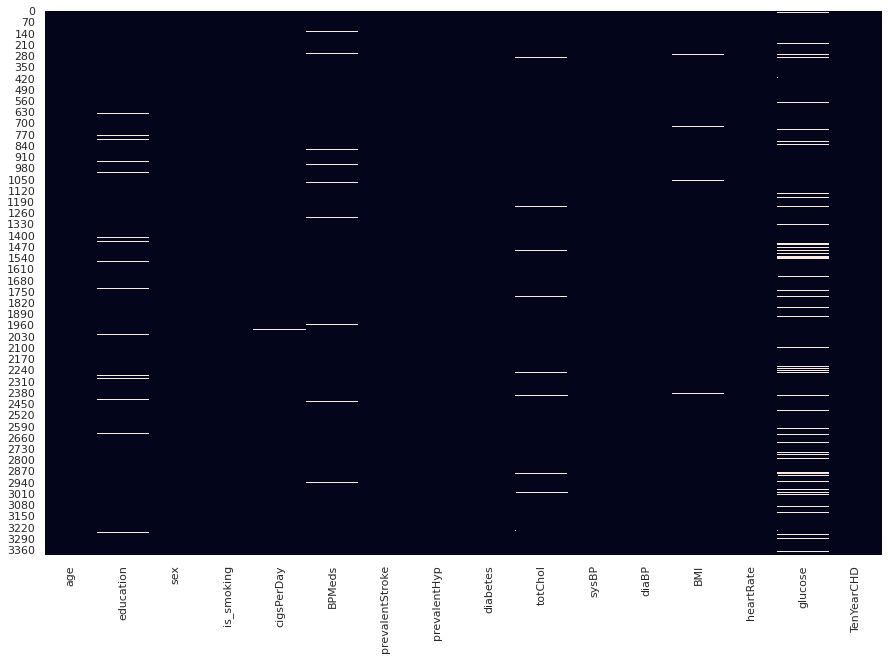

In [22]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cbar=False)

In [23]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

In [24]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

We can observe that how many categories and how many unique values are present in categorical variables and numerical variables. So for further study, we are define two lists as categorical and numerical variables.

In [25]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
dependent_var = ['ten_year_chd']

In [26]:
#defining categorical variables as categorical
for i in categorical_columns:
  data[i].astype("category")

In [27]:
#checking the categories in each categorical column
for i in categorical_columns:
  if i!='cigsPerDay':
    print(i,data[i].value_counts().reset_index(),"\n")

education    index  education
0    1.0       1391
1    2.0       1077
2    3.0        549
3    4.0        373 

sex    index   sex
0      0  1923
1      1  1467 

is_smoking    index  is_smoking
0      0        1703
1      1        1687 

BPMeds    index  BPMeds
0    0.0    3290
1    1.0     100 

prevalentStroke    index  prevalentStroke
0      0             3368
1      1               22 

prevalentHyp    index  prevalentHyp
0      0          2321
1      1          1069 

diabetes    index  diabetes
0      0      3303
1      1        87 

TenYearCHD    index  TenYearCHD
0      0        2879
1      1         511 



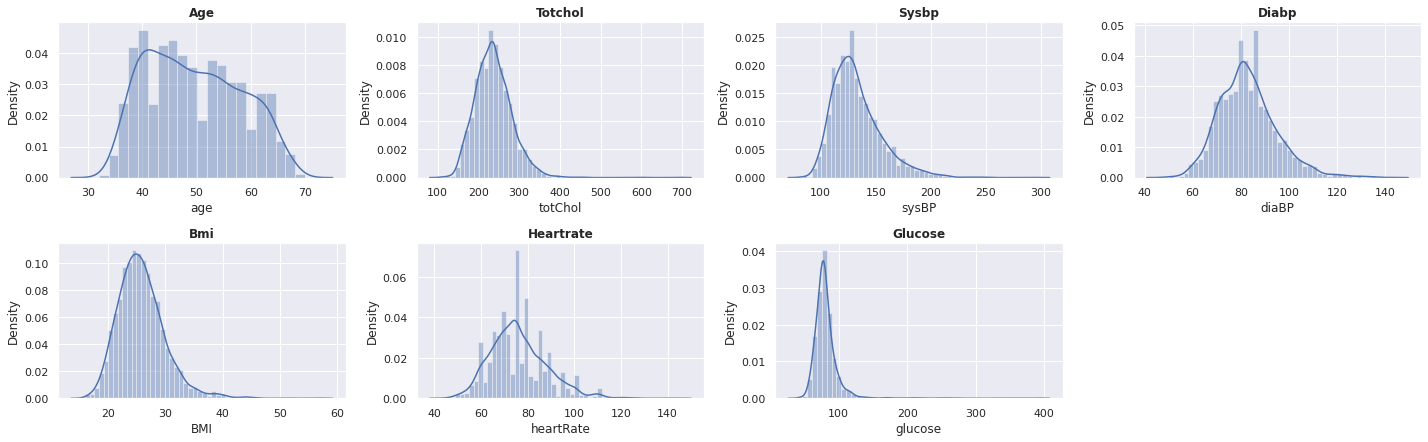

In [28]:
# Visualizing the distributions.
plt.figure(figsize=(20,15))
for n,column in enumerate(numerical_columns):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Text(0.5, 1.0, 'Cardiovascular Risk rate')

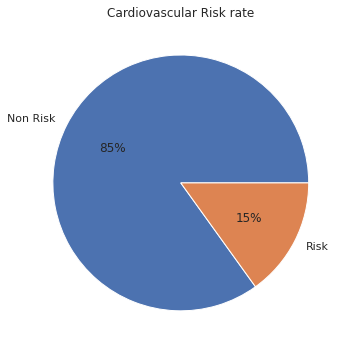

In [29]:
fig, ax = plt.subplots(figsize = (30, 20))

plt.subplot(3,2,1)
labels = 'Non Risk',"Risk"
plt.pie(data['TenYearCHD'].value_counts(), labels=labels ,autopct='%2.0f%%')
plt.title("Cardiovascular Risk rate")

Text(0.5, 1.0, 'Blood pressure rate of people')

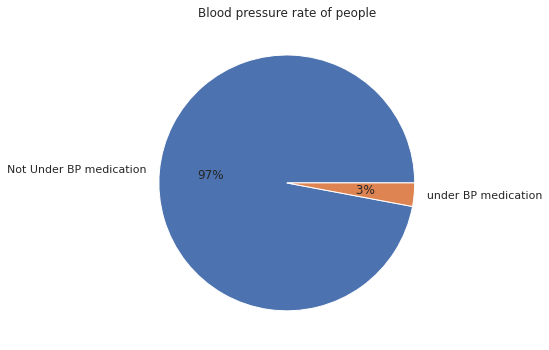

In [30]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.subplot(3,2,2)
labels = 'Not Under BP medication',"under BP medication"
plt.pie(data['BPMeds'].value_counts(), labels=labels ,autopct='%2.0f%%')
plt.title("Blood pressure rate of people")

Text(0.5, 1.0, '% people who had Stroke previously')

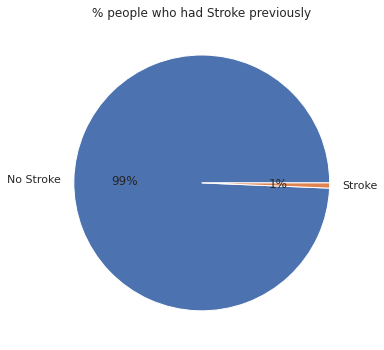

In [31]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.subplot(3,2,3)
labels = 'No Stroke','Stroke'
plt.pie(data['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had Stroke previously")

Text(0.5, 1.0, '% people who had hypertension previously')

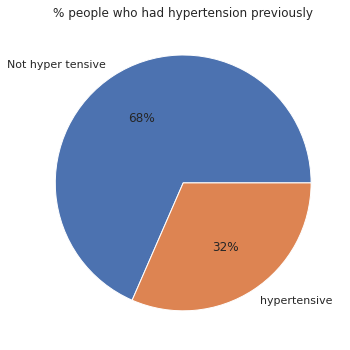

In [32]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.subplot(3,2,4)
labels = 'Not hyper tensive','hypertensive'
plt.pie(data['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had hypertension previously")

Text(0.5, 1.0, '% people who had diabetes ')

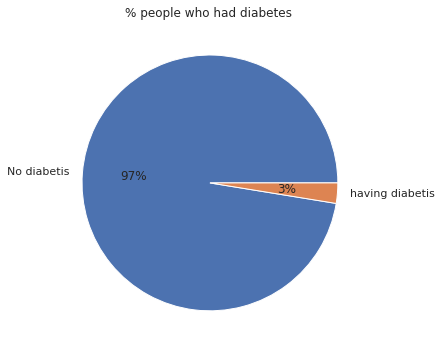

In [33]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.subplot(3,2,5)
labels = 'No diabetis','having diabetis'
plt.pie(data['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had diabetes ")

Text(0.5, 1.0, 'Education level of people ')

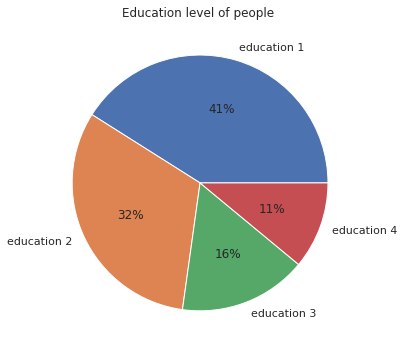

In [34]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.subplot(3,2,6)
labels = 'education 1','education 2','education 3','education 4'
plt.pie(data['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

we can observe that,

(1) 85% of people are not at risk of Cardio Vascular Risk.

(2) 3% of people who are taking BP medication.

(3) 1% of people who had stroke previously.

(4) 32% of people are having Hyper Tension.

(5) 97% of the people who are non diabetic.

(6) 11% of the people are having highest level education and 42% of the people are having basic education level.

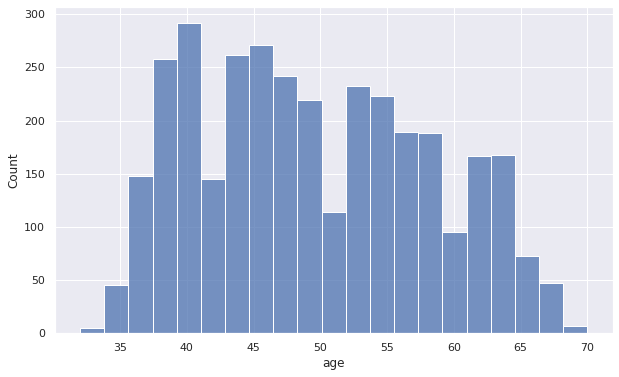

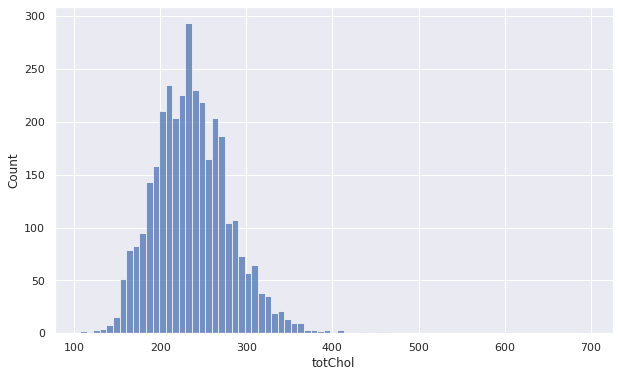

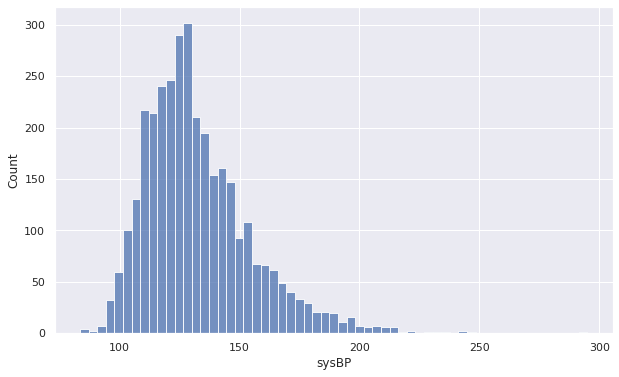

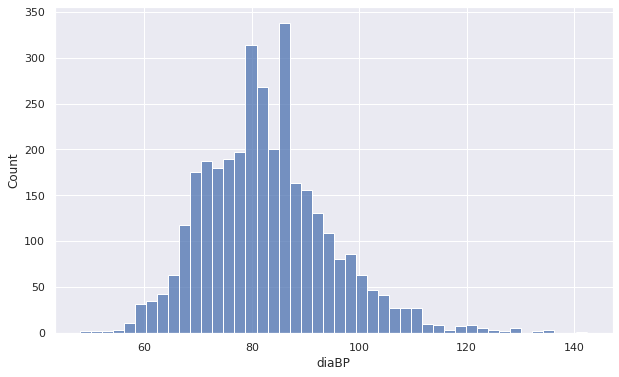

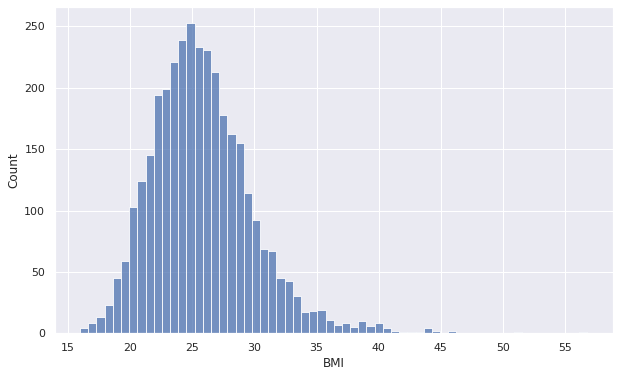

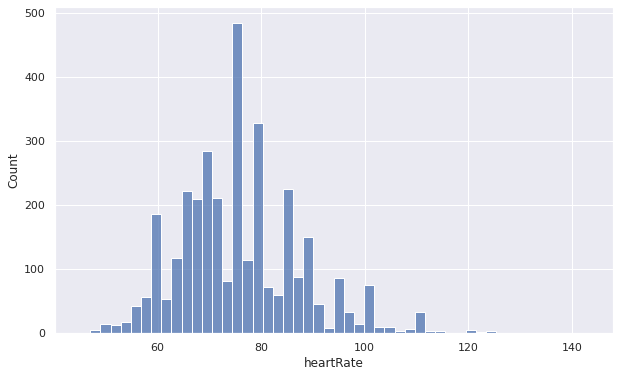

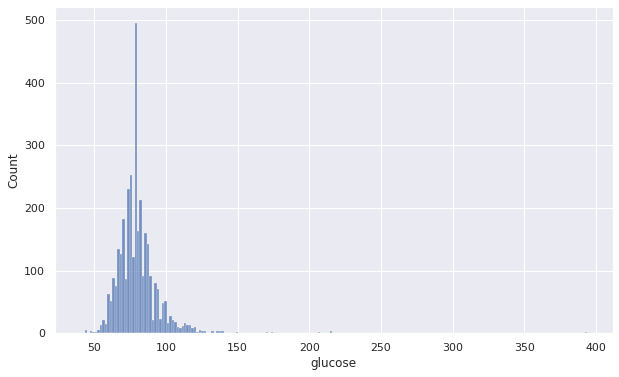

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data[i])

In [36]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [37]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


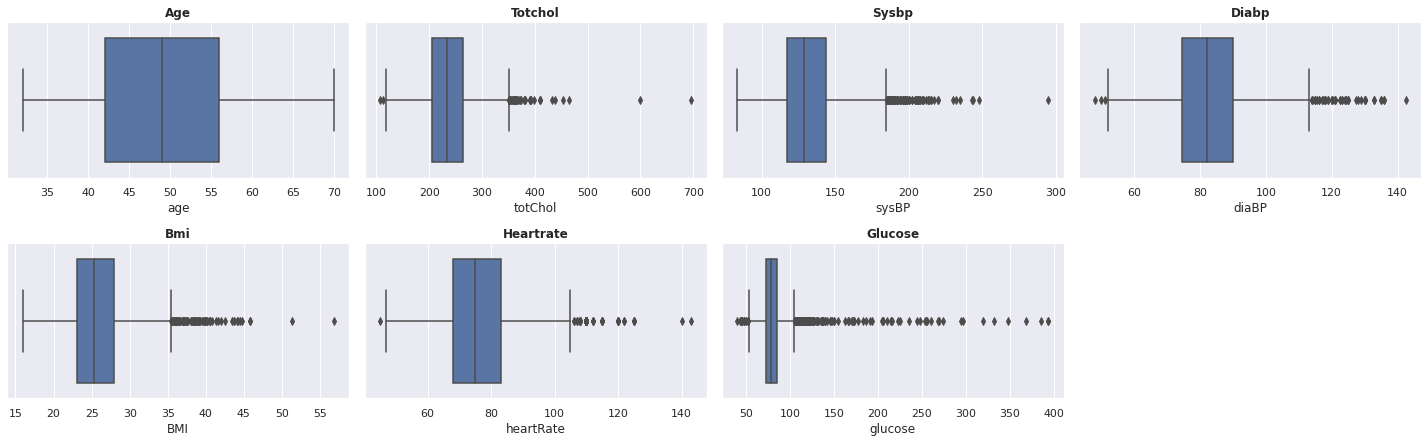

In [39]:
# Visualizing the distributions.
plt.figure(figsize=(20,15))
for n,column in enumerate(numerical_columns):
  plt.subplot(5,4,n+1) 
  sns.boxplot(data[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

In [40]:
data1= data.copy()
df=data.copy()

In [41]:
# Removing outliers by standard methods and Plotting graphs:
for col in numerical_columns:
  q1,q3,median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col]= np.where(df[col] > upper_limit, median, np.where(
                        df[col] < lower_limit,median,df[col]))

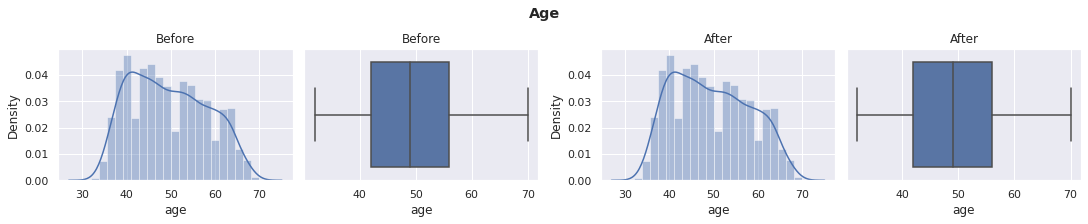

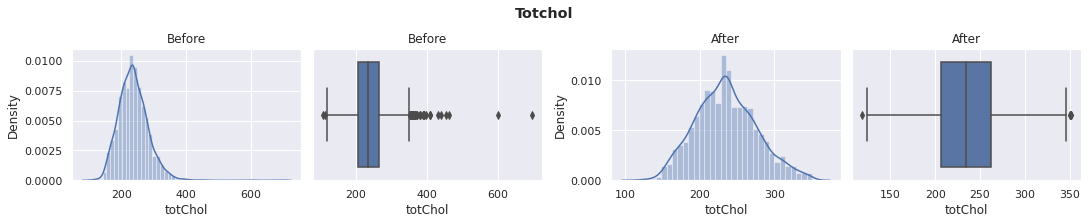

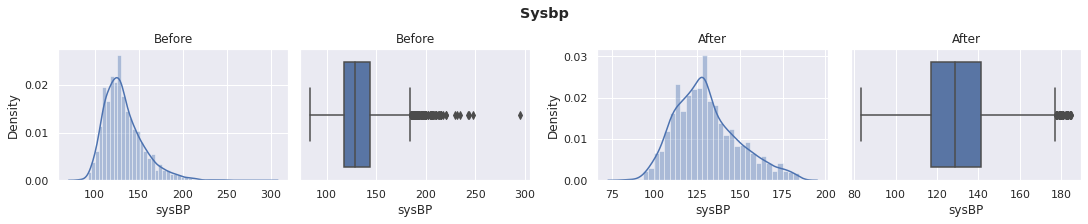

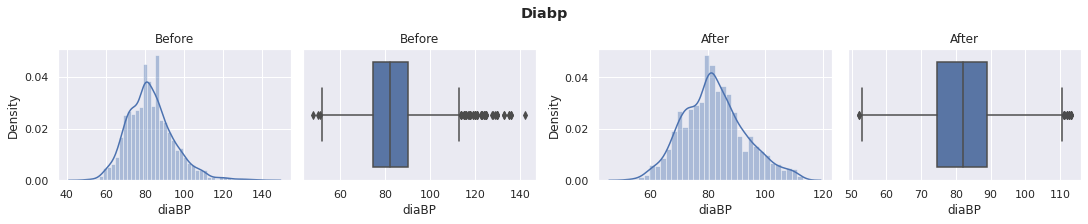

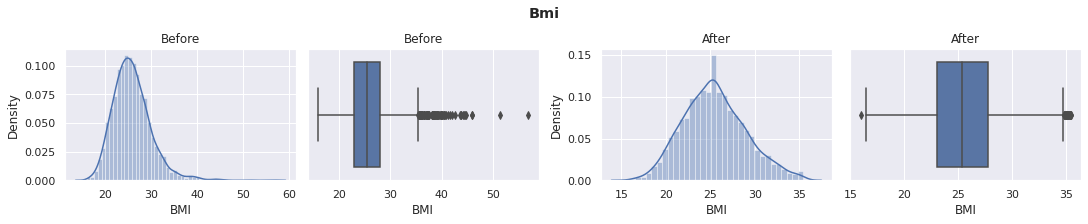

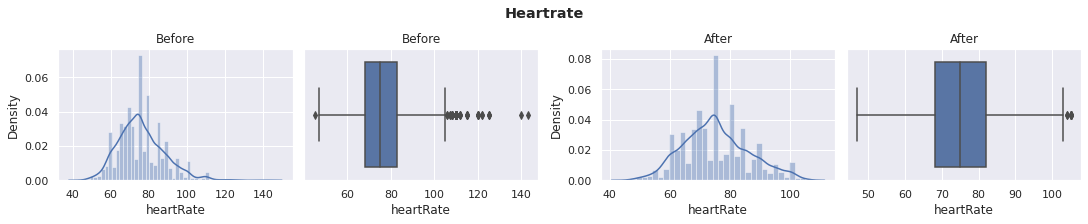

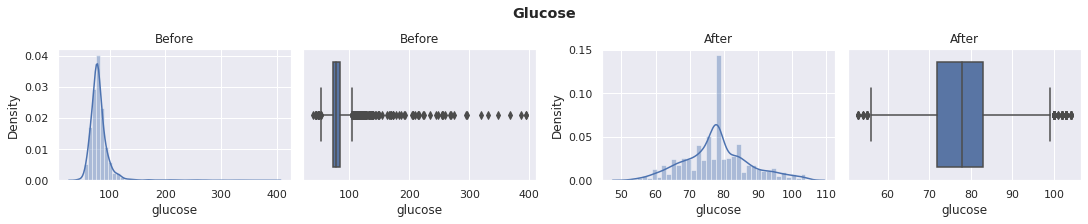

In [42]:
# Plotting Graphs Before treating outliers 
for col in numerical_columns:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

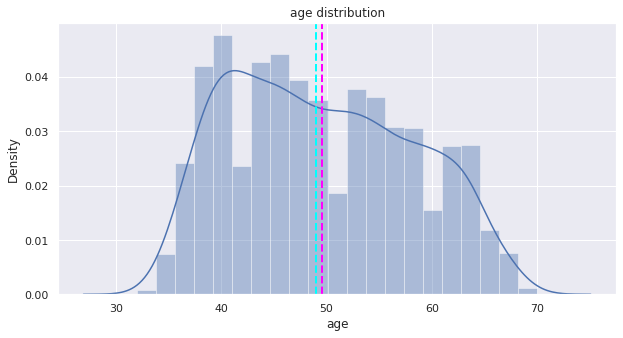

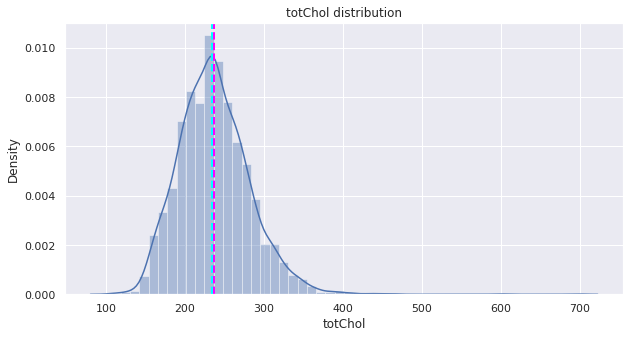

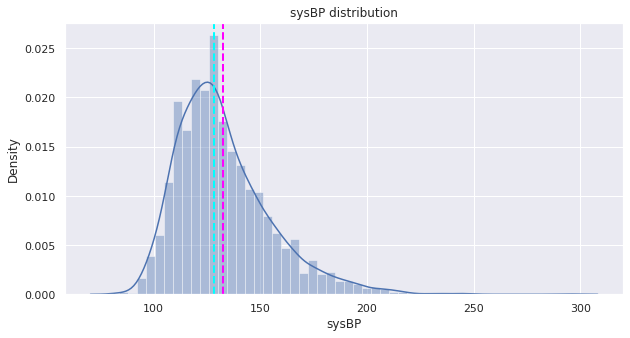

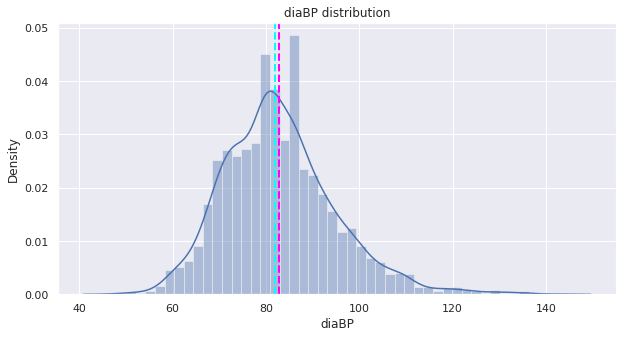

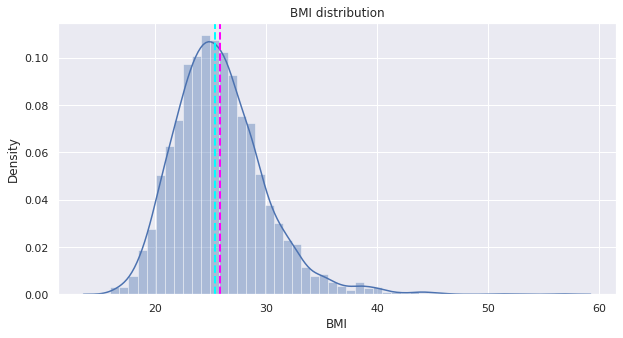

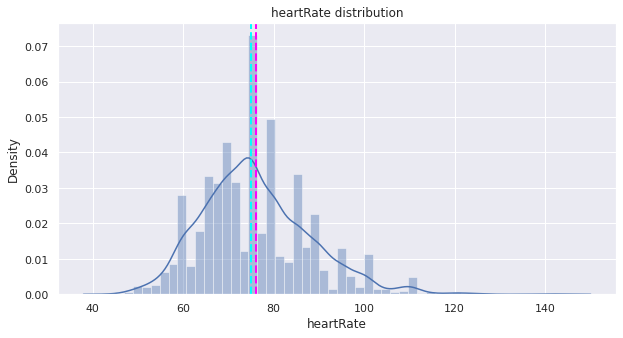

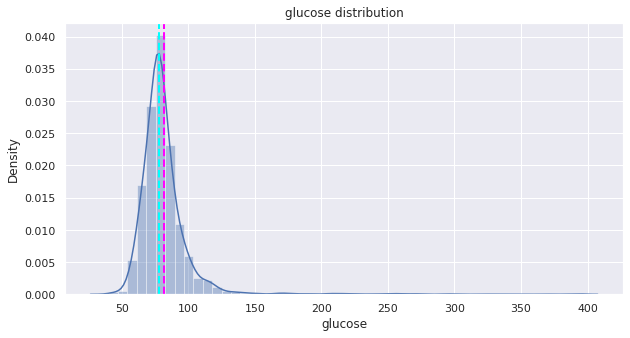

In [43]:
# Analysing the distribution of continuous variables in the dataset
for col in numerical_columns:
  plt.figure(figsize=(10,5))
  sns.distplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

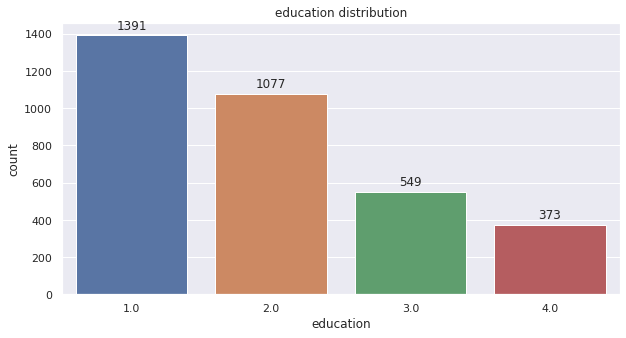

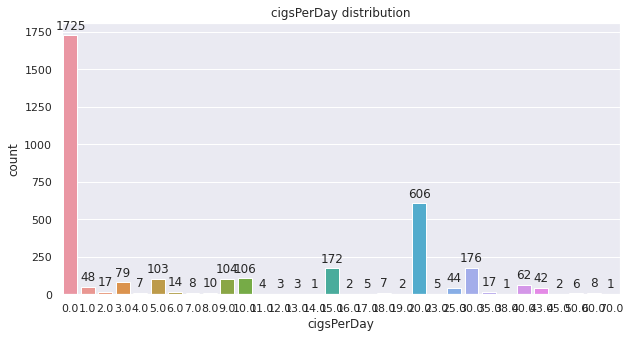

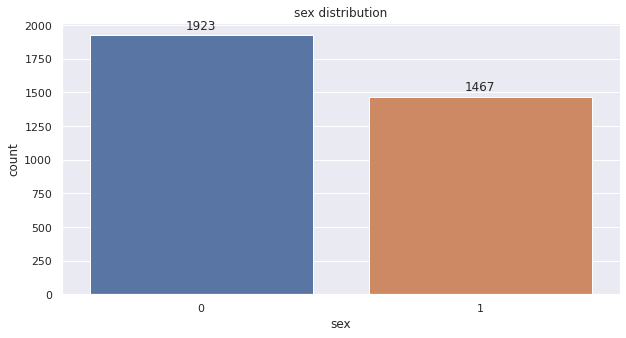

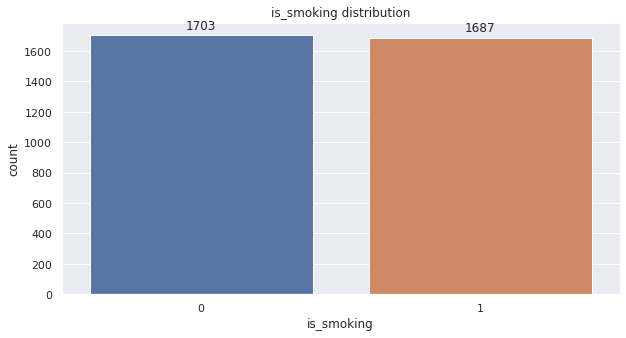

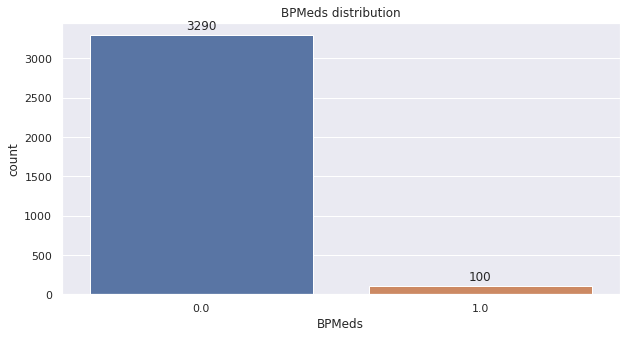

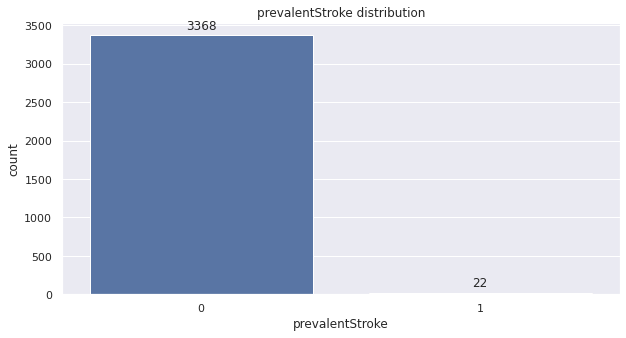

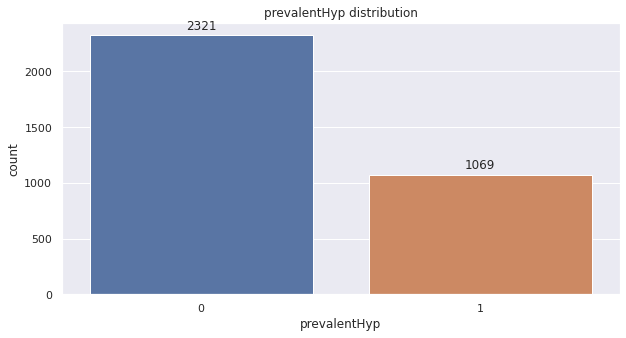

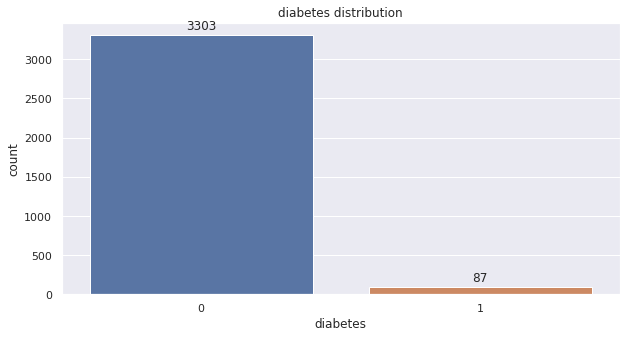

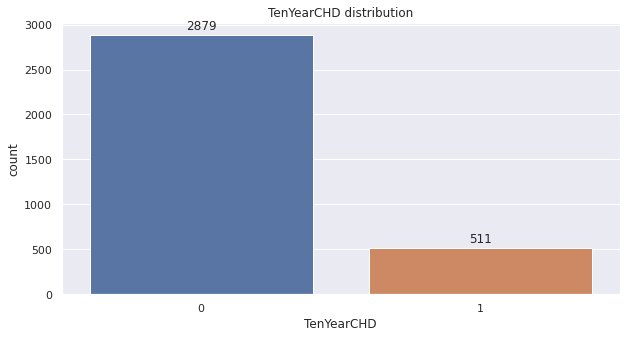

In [44]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_columns:
  plt.figure(figsize=(10,5))
  p = sns.countplot(data[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

Observations

* Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.

* There are more female patients compared to male patients.

* Almost half the patients are smokers.
* 100 patients under the study are undertaking blood pressure medication.
* 22 patients under the study have experienced a stroke.
* 1069 patients have hypertension.
* 87 patients have diabetes.

Analyzing the relationship between the dependent variable and the numeric variables in the data:

In [45]:
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
dependent_var = ['ten_year_chd']

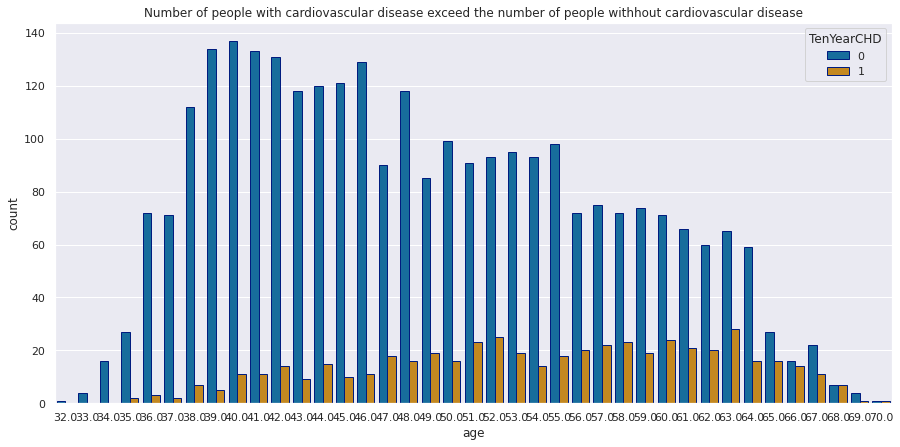

In [46]:
# Visualising the target and age variable
plt.figure(figsize=[15,7])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

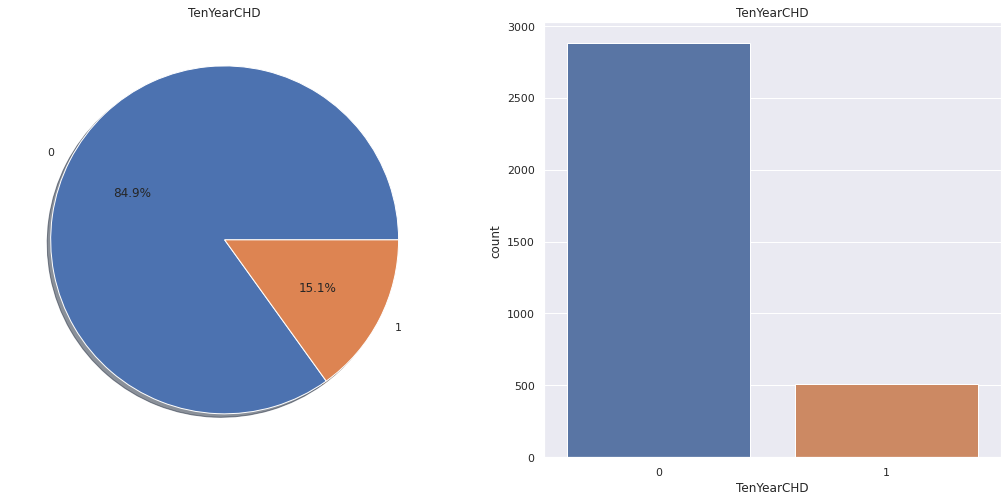

In [47]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(18,8))
data['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD',data=df,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

In [48]:
# checking the distribution of Target Variable
data.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

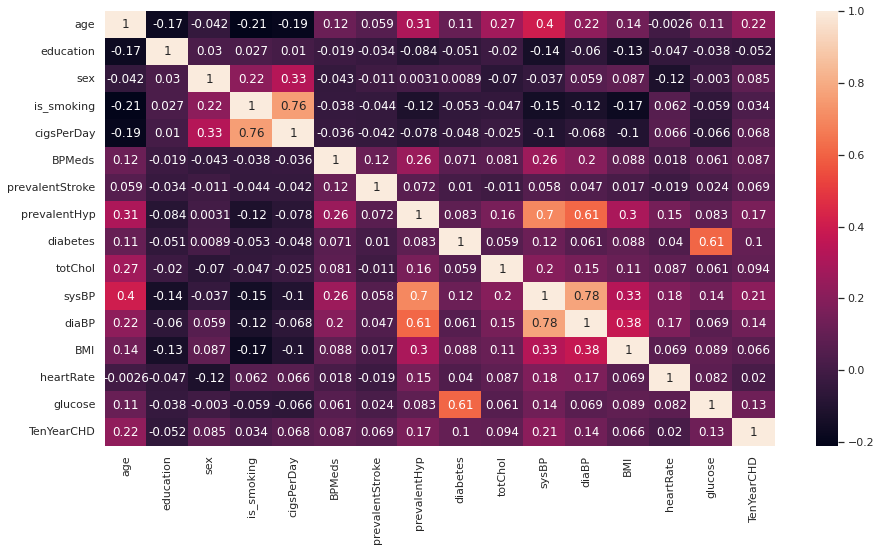

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

From the above correlation heatmap we can observe that,

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model.

These includes:

Blood glucose and diabetes;

systolic and diastolic blood pressures;

cigarette smoking and the number of cigarretes smoked per day.

Therefore we need to carry out feature selection to pick the best features.



Text(0.5, 0, 'Numerical variables')

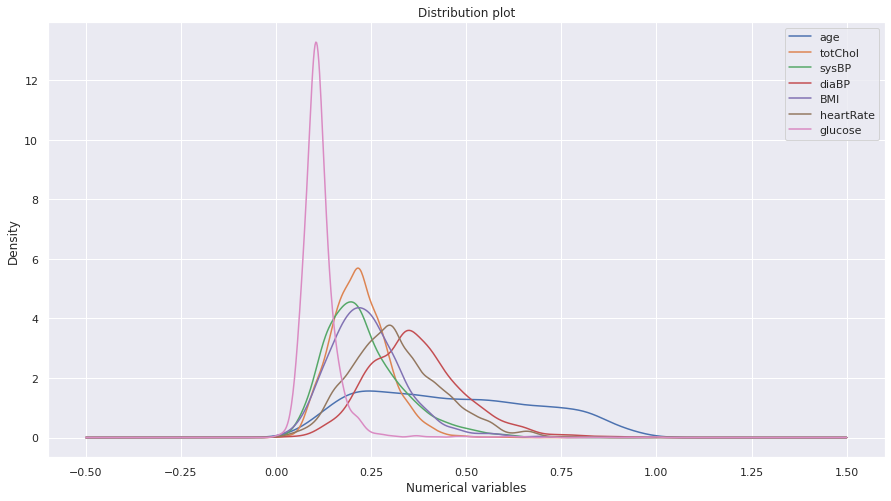

In [50]:
#Min max scaler
column_names = numerical_columns
# column_names
#taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
#using standardization as both numeric columns are in different scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[numerical_columns])
#print(scaled)
cardio_2 = pd.DataFrame(scaler.fit_transform(data[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

Feature Engineering/Selection

In [51]:
#define the features
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [53]:
# Important or top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [54]:
# Importing statsmodels 
import statsmodels.api as sm

In [55]:
# Splitting the dependent and independent variables
top_features = data[embeded_rf_feature]
y = data['TenYearCHD']

In [56]:
# Fit the data
result = sm.Logit(y,top_features).fit()
# The summary table below, gives us a descriptive summary about the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.412827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                 0.02632
Time:                        02:53:40   Log-Likelihood:                -1399.5
converged:                       True   LL-Null:                       -1437.3
Covariance Type:            nonrobust   LLR p-value:                 2.804e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0219      0.006      3.652      0.000       0.010       0.034
totChol       -0.0023      0.

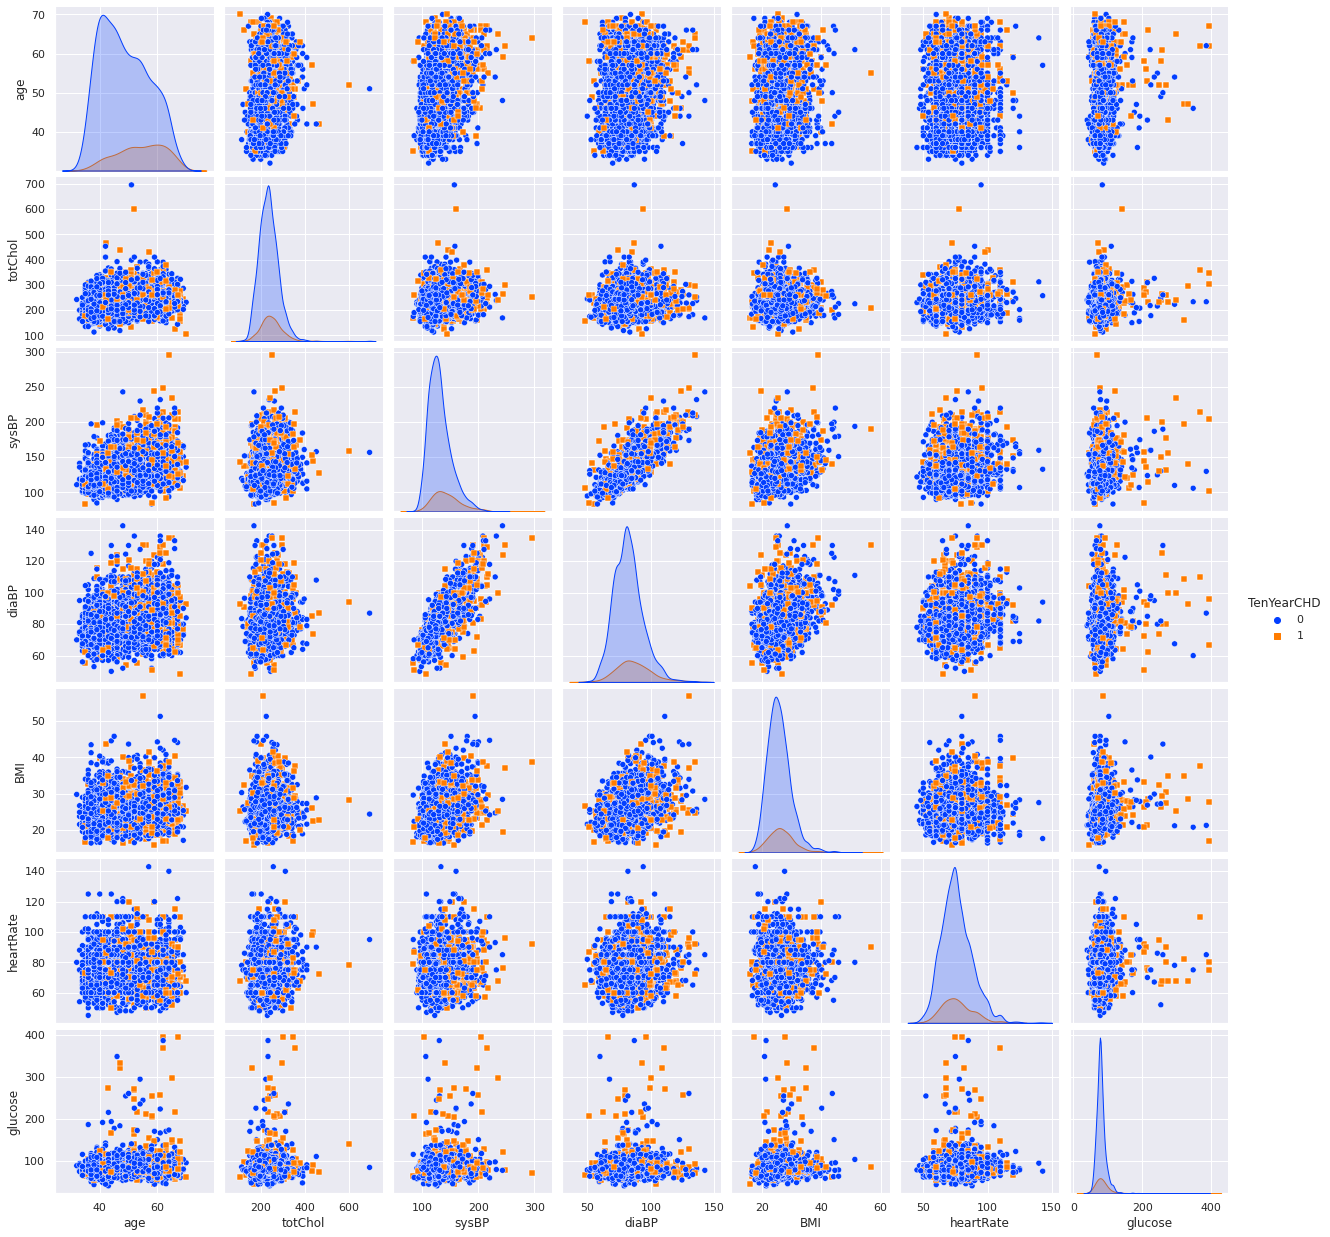

In [57]:

# Plotting pairplot of top features vs target variable
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright')

SMOTE :

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE()

X = data[embeded_rf_feature]
y = data.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


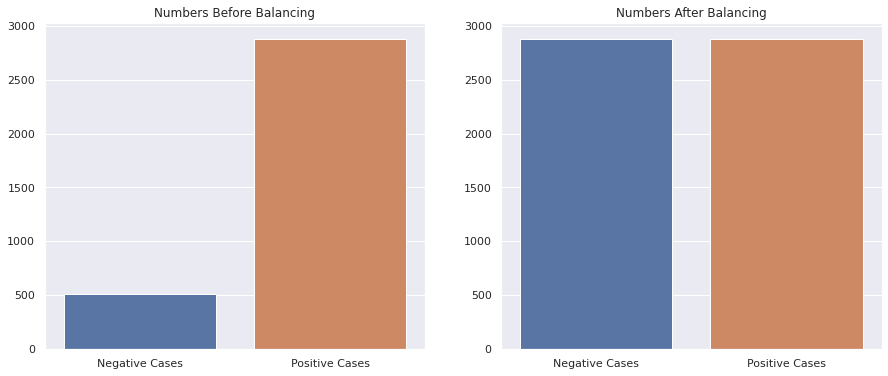

In [60]:
from collections import Counter
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(dict(Counter(y)).values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(dict(Counter(y_smote)).values()))
plt.title("Numbers After Balancing")
plt.show()

Splitting the data to Training and Testing set

In [61]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,241.0,136.5,85.0,26.42,70.0,77.0,0


In [62]:
X_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4606 records and Testing features have 1152 records.


In [64]:

# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [65]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [66]:
#training the classifier
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_

{'C': 10000.0, 'class_weight': 'balanced', 'penalty': 'l2'}

In [67]:
#making predictions
logistic_predict = logistic_clf.predict(X_test)

In [68]:
logistic_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 63.63%


In [70]:
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6474164133738601
Test ROC-AUC score :  0.6362847222222222


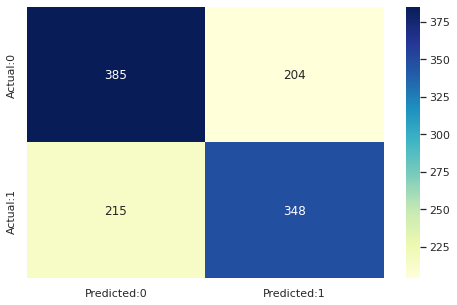

In [71]:
# confusion matrix of Logistic Model
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [72]:
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       589
           1       0.63      0.62      0.62       563

    accuracy                           0.64      1152
   macro avg       0.64      0.64      0.64      1152
weighted avg       0.64      0.64      0.64      1152



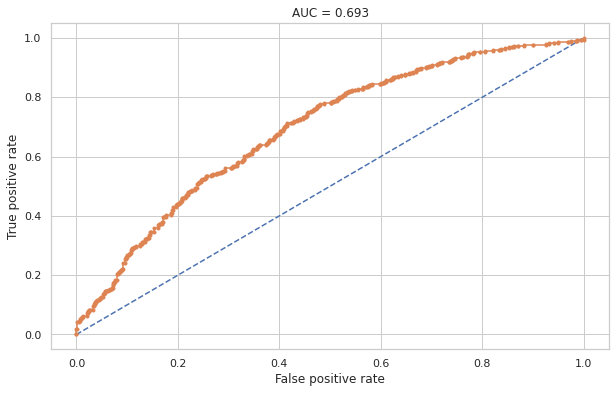

In [73]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

random forest

In [74]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

In [75]:
random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

In [76]:
#training the classifier
random_clf.fit(X_train,Y_train)

random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [77]:
#making predictions 
random_predict = random_clf.predict(X_test)

In [78]:
random_accuracy = accuracy_score(Y_test,random_predict)
print(f"Using logistic regression we get an accuracy of {round(random_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 67.53%


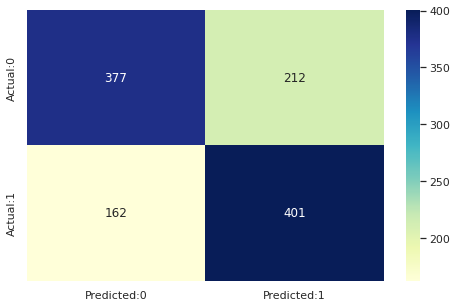

In [79]:
# confusion matrix of Random Forest
cm=confusion_matrix(Y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [80]:
print(classification_report(Y_test,random_predict))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       589
           1       0.65      0.71      0.68       563

    accuracy                           0.68      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.68      0.68      0.68      1152



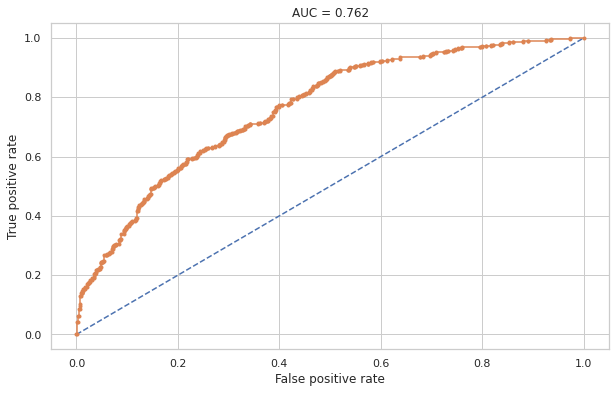

In [81]:
# ROC curve and AUC 
probs1 = random_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
ran_auc = roc_auc_score(Y_test, probs1)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(ran_auc,3)}")
plt.show()

Support Vector Machine

In [84]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
#training the classifier
svm_clf.fit(X_train,Y_train)

svm_clf.best_params_

In [ ]:
#making predictions 
svm_predict = svm_clf.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

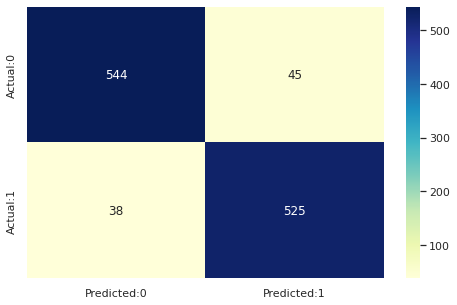

In [88]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [89]:
print(classification_report(Y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       589
           1       0.92      0.93      0.93       563

    accuracy                           0.93      1152
   macro avg       0.93      0.93      0.93      1152
weighted avg       0.93      0.93      0.93      1152



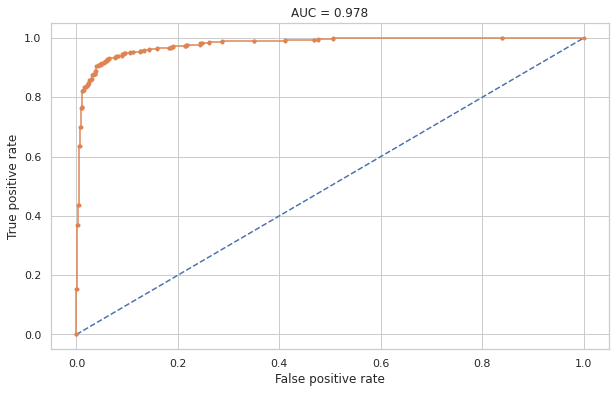

In [90]:
# ROC curve and AUC 
probs3 = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
svc_auc = roc_auc_score(Y_test, probs3)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs3)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()

In [91]:
# Creating dataframe which shows the performance metrics of each model
Performance_df = pd.DataFrame({
    "Logistic regression":{'Test Accuracy':logistic_accuracy.round(2),'Precision': precision_score(Y_test, logistic_predict).round(2),'Recall': recall_score(Y_test, logistic_predict).round(2),'F1 Score': f1_score(Y_test, logistic_predict).round(2), 'AUC':log_auc.round(2)},
    "Random Forest":{'Test Accuracy':random_accuracy.round(2),'Precision': precision_score(Y_test, random_predict).round(2),'Recall': recall_score(Y_test, random_predict).round(2),'F1 Score': f1_score(Y_test, random_predict).round(2), 'AUC':ran_auc.round(2)},
    "Support vector machine":{'Test Accuracy':svm_accuracy.round(2),'Precision': precision_score(Y_test, svm_predict).round(2),'Recall': recall_score(Y_test, svm_predict).round(2),'F1 Score': f1_score(Y_test, svm_predict).round(2), 'AUC':svc_auc.round(2)}
}).T

In [92]:
Performance_df

,Test Accuracy,Precision,Recall,F1 Score,AUC
Logistic regression,0.64,0.63,0.62,0.62,0.69
Random Forest,0.68,0.65,0.71,0.68,0.76
Support vector machine,0.93,0.92,0.93,0.93,0.98


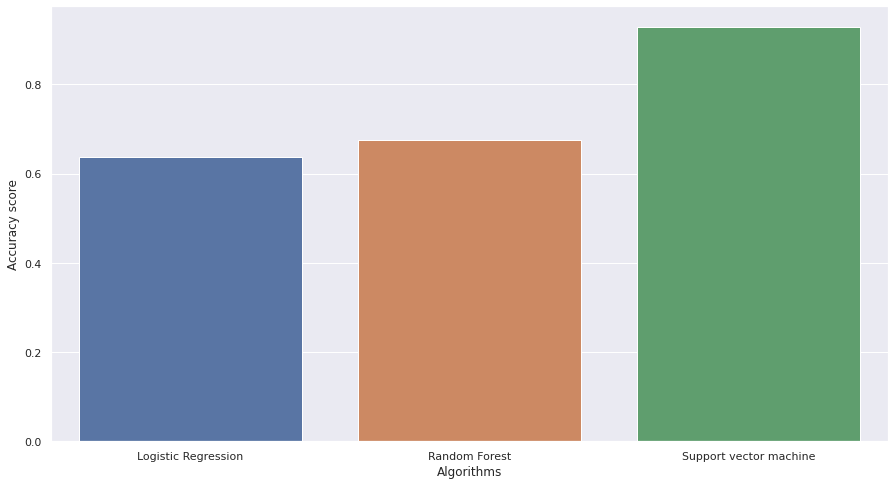

In [93]:
# Storing accuracies of each algorithm in a list
scores = [logistic_accuracy,random_accuracy,svm_accuracy]
# Naming the algorithms and storing in a list
algorithms = ["Logistic Regression","Random Forest","Support vector machine"] 
# Visualize the algorithms
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)